# Estimate polarization from raytracing

### Feb 15, 2021

## Code

In [2]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [3]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

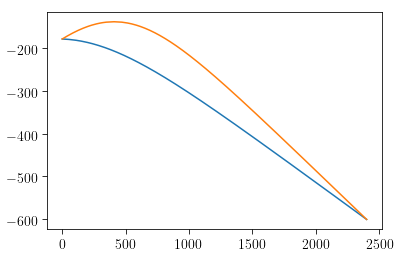

In [19]:
rt = pyrex.RayTracer(from_point=(0, 0, -179.93), to_point=(2400, 0, -600))
path = rt.solutions[0]
path2 = rt.solutions[1]

plt.plot(path.coordinates[0],path.coordinates[2], label="Direct ray")
plt.plot(path2.coordinates[0],path2.coordinates[2], label="Reflected ray")

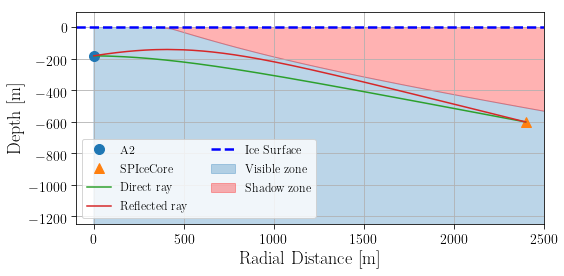

In [72]:
fig, ax1 = plt.subplots(figsize=(8,4))

ant = (0, 0, -200)
zs = np.linspace(0, -3000, 301)
rs = np.zeros_like(zs)
for j, depth in enumerate(zs):
    rt = pyrex.RayTracer(ant, (0, 0, depth))
    rs[j] = max(rt.direct_r_max, rt.indirect_r_max)
plt.fill_betweenx(zs, rs, np.zeros_like(rs), color='C0', alpha=0.3, label = "Visible zone")
plt.fill_betweenx(zs, rs,rs+4000, color='red', alpha=0.3, label = "Shadow zone")
plt.plot(0, -179.93,"o", label="A2", markersize = 10)
plt.plot(2400, -600, "^", label="SPIceCore", markersize = 10)
plt.plot(path.coordinates[0],path.coordinates[2], label="Direct ray")
plt.plot(path2.coordinates[0],path2.coordinates[2], label="Reflected ray")
plt.axhline(0, ls= "--", lw = 2.5, c='b', label = "Ice Surface")
plt.xlim(-100, 2500)
plt.ylim(-1250, 100)
plt.xlabel("Radial Distance [m]")
plt.ylabel("Depth [m]")
plt.grid()
plt.legend(ncol = 2)
plt.tight_layout()
plt.savefig('./ShadowZone.pdf')